Import necessary libraries:


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
from PIL import Image
import random
import numpy as np
from datetime import datetime

In [114]:
pd.set_option('display.max_columns', None)

Read the data.


In [115]:
df = pd.read_csv('DigiKala.csv')

How many null values do we have in each column?


In [116]:
null_counts = df.isnull().sum()
print(null_counts)

data_product_id                                                854
data_product_title_fa                                          854
data_product_status                                            854
data_product_has_quick_view                                    854
data_product_data_layer_brand                                  854
data_product_data_layer_category                               854
data_product_data_layer_item_category2                         854
data_product_data_layer_item_category4                        2450
data_product_data_layer_item_category5                       16377
data_product_product_type                                      854
data_product_digiplus_services                                 859
data_product_digiplus_is_jet_eligible                          859
data_product_digiplus_cash_back                                859
data_product_digiplus_is_general_location_jet_eligible         859
data_product_digiplus_fast_shipping_text                     5

One-hot encode the column 'data_product_status'


In [117]:
df = pd.get_dummies(df, columns=['data_product_status'])

Make the column 'data_product_has_quick_view' binary.


In [118]:
df['data_product_has_quick_view'] = df['data_product_has_quick_view'].apply(lambda x: 1 if x else 0)

Make another dataframe called "data_product_data_layer_categories" from the column "data_product_data_layer_category"
<br/>
Each product must have a row, which the categories are neither 0 nor 1.
<br/>
for example, one row can be like this with the following columns(the columns must be in Persian):
<br/>
<br/>
data_product_id: 1595827.0
<br/>
اسباب بازی = 1
<br/>
ابزار سلامت خانگی = 0


In [119]:
categories = df['data_product_data_layer_category'].str.get_dummies(sep=',')
categories.columns = categories.columns.str.strip()  # Clean column names
data_product_data_layer_categories = pd.concat([df['data_product_id'], categories], axis=1)

Make another data frame according to the 'data_product_data_layer_category' named 'data_product_data_layer_category_mapping'
<br/>
in this data frame, we have two columns that maps the English abbreviation to the Persian category.


In [120]:
data_product_data_layer_category_mapping = pd.DataFrame({
    'English': ['BT', 'Other_Abbreviation'],  # Replace with actual abbreviations
    'Persian': ['اسباب بازی', 'دسته دیگر']  # Replace with actual Persian categories
})

Filter the rows in the data frame with the following values:
<br/>
<br/>
data_product_data_layer_brand = سامسونگ
<br/>
data_product_data_layer_item_category2 = کالای دیجیتال
<br/>
&&
<br/>
data_product_data_layer_brand = اپل
<br/>
data_product_data_layer_item_category2 = کالای دیجیتال

<br/>
calculate the count of each.


In [121]:
samsung_digital = df[(df['data_product_data_layer_brand'] == 'سامسونگ') & 
                     (df['data_product_data_layer_item_category2'] == 'کالای دیجیتال')]
apple_digital = df[(df['data_product_data_layer_brand'] == 'اپل') & 
                   (df['data_product_data_layer_item_category2'] == 'کالای دیجیتال')]
print(f"Samsung digital products: {len(samsung_digital)}")
print(f"Apple digital products: {len(apple_digital)}")

Samsung digital products: 143
Apple digital products: 92


What are the 10 most repeated categories in 'data_product_data_layer_item_category4' with their relative percentage?


In [122]:
top_10_categories = df['data_product_data_layer_item_category4'].value_counts().nlargest(10)
top_10_categories_percent = top_10_categories / len(df) * 100
print(top_10_categories_percent)

لوازم جانبی گوشی موبایل    6.462642
اسباب بازی                 3.414943
مراقبت پوست                2.520051
لباس مردانه                2.290699
مبلمان و دکوراسیون         2.114816
لباس زنانه                 2.096525
اکسسوری زنانه              1.938933
نوشت افزار                 1.868580
لوازم تزئینی خودرو         1.463346
اکسسوری زنانه و مردانه     1.404249
Name: data_product_data_layer_item_category4, dtype: float64


How many distinct values are there in the 'data_product_product_type' column and what are they?


In [123]:
product_types = df['data_product_product_type'].unique()
print(f"Number of distinct product types: {len(product_types)}")
print(f"Product types: {product_types}")


Number of distinct product types: 4
Product types: ['product' nan 'giftcard' 'dk_electronic_gift_card']


Filter the rows that both columns 'data_product_digiplus_services' and 'data_product_digiplus_is_jet_eligible' are true in them.


In [124]:
digiplus_jet = df[(df['data_product_digiplus_services'] == True) & 
                  (df['data_product_digiplus_is_jet_eligible'] == True)]
print(f"Number of DigiPlus Jet eligible products: {len(digiplus_jet)}")


Number of DigiPlus Jet eligible products: 0


What values are in the following columns? What useful information do they have?:
<br/>
<br/>
'data_product_digiplus_cash_back'
<br/>
'data_product_digiplus_is_general_location_jet_eligible'
<br/>
'data_product_images_main_thumbnail_url'
<br/>
'data_product_images_main_temporary_id'


In [125]:
cash_back_values = df['data_product_digiplus_cash_back'].unique()
general_location_jet_eligible_values = df['data_product_digiplus_is_general_location_jet_eligible'].unique()
thumbnail_urls = df['data_product_images_main_thumbnail_url'].unique()
temporary_ids = df['data_product_images_main_temporary_id'].unique()

print(f"Cash Back Values: {cash_back_values}")
print(f"General Location Jet Eligible Values: {general_location_jet_eligible_values}")
print(f"Thumbnail URLs: {thumbnail_urls}")
print(f"Temporary IDs: {temporary_ids}")

Cash Back Values: [ 0. nan]
General Location Jet Eligible Values: [False nan]
Thumbnail URLs: [nan]
Temporary IDs: [nan]


Plot the hist plot of the column 'data_product_digiplus_fast_shipping_text'


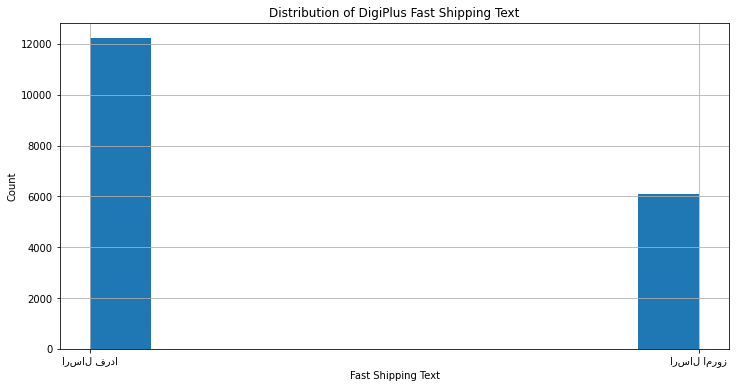

In [126]:
plt.figure(figsize=(12, 6))
df['data_product_digiplus_fast_shipping_text'].hist()
plt.title('Distribution of DigiPlus Fast Shipping Text')
plt.xlabel('Fast Shipping Text')
plt.ylabel('Count')
plt.show()

Write a code that downloads the images in the 'data_product_images_main_url' column automatically.
<br/>
Run the code for 10 random rows and then plot the images using matplotlib.


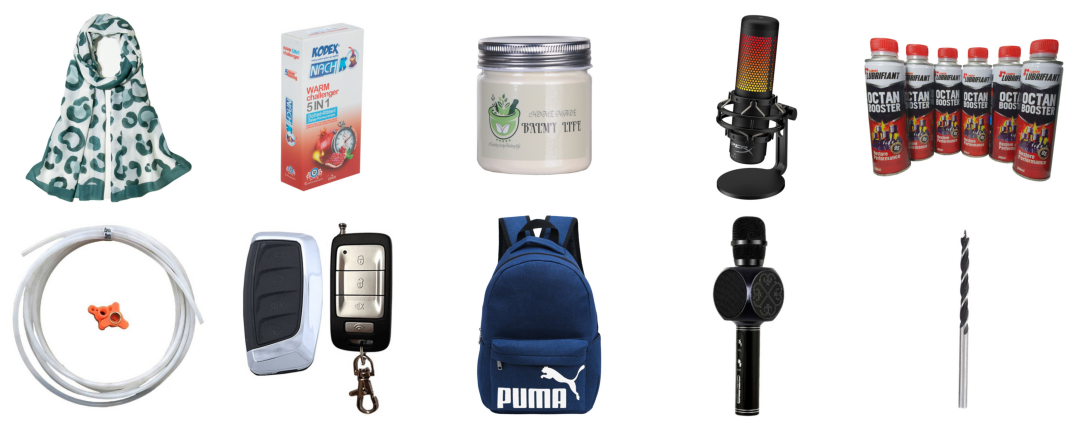

In [127]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import random

def extract_image_url(url_str):
    if isinstance(url_str, str) and url_str.startswith("["):
        try:
            url_list = eval(url_str)
            if isinstance(url_list, list) and len(url_list) > 0:
                return url_list[0]  # Return the first URL in the list
        except Exception as e:
            print(f"Error evaluating URL string {url_str}: {e}")
    return None

df['image_url'] = df['data_product_images_main_url'].apply(extract_image_url)
sampled_urls = df['image_url'].dropna().sample(10)
images = []
for url in sampled_urls:
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        images.append(img)
    except Exception as e:
        print(f"Could not retrieve image from {url}: {e}")
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for ax, img in zip(axs.flatten(), images):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()


Plot the distribution of the 'data_product_rating_rate' column.


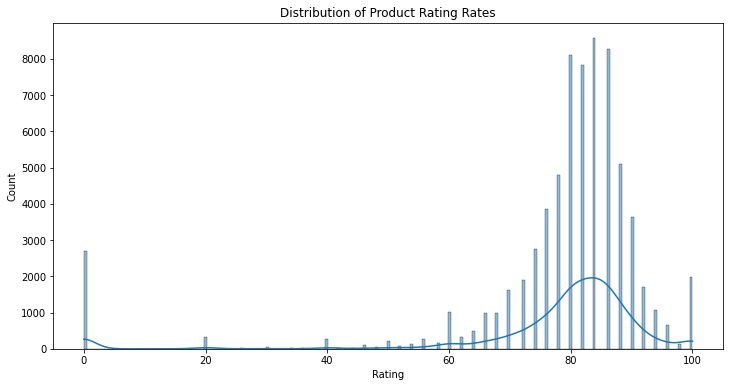

In [128]:
plt.figure(figsize=(12, 6))
sns.histplot(df['data_product_rating_rate'], kde=True)
plt.title('Distribution of Product Rating Rates')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Make another column based on the column 'data_product_rating_rate,' that has 10 values, 1 to 5.
<br/>
Each rate value must be categorized into one of these 5 categories based on the following rules.
<br/>
<br/>
0<rate<20 ==> A
<br/>
20<rate<40 ==> B
<br/>
40<rate<60 ==> C
<br/>
60<rate<80 ==> D
<br/>
80<rate<100 ==> E


In [129]:
def rate_category(rate):
    if 0 < rate <= 20:
        return 'A'
    elif 20 < rate <= 40:
        return 'B'
    elif 40 < rate <= 60:
        return 'C'
    elif 60 < rate <= 80:
        return 'D'
    elif 80 < rate <= 100:
        return 'E'
    else:
        return np.nan

df['rating_category'] = df['data_product_rating_rate'].apply(rate_category)



What are the 5 products that have the most rate counts based on the column 'data_product_rating_count'?


In [130]:
top_rated_products = df.nlargest(5, 'data_product_rating_count')[['data_product_title_fa', 'data_product_rating_count']]
top_rated_products.head()

,data_product_title_fa,data_product_rating_count
67461,پایه نگهدارنده گوشی و تبلت مدل OK Stand,59877.0
17228,پایه نگهدارنده شارژر موبایل مدل Hng 0229,34191.0
65576,برس پاک‌سازی مدل beauty skin,30793.0
58151,هدفون بلوتوثی مدل inPods 12,27491.0
63263,ماسک تنفسی مدل ملت بلون بسته 51 عددی,26890.0


Add a new column 'data_product_color_ids' so that we only have the list of color 'id's of the product in the column.
<br/>
Then plot the distribution of the 20 most used product colors.
<br/>
What is the most used color in the products?


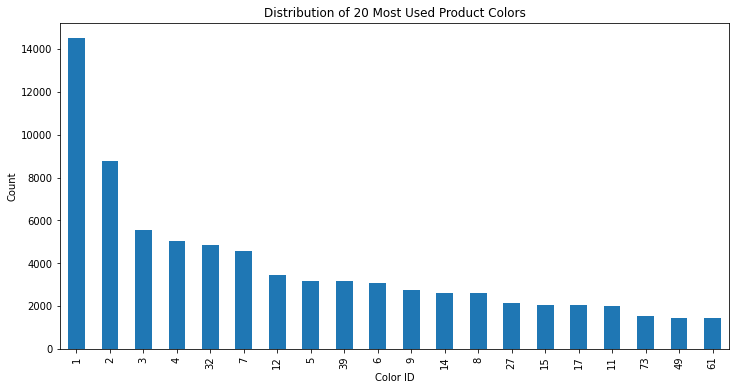

Most used color ID: 1


In [131]:
df['data_product_color_ids'] = df['data_product_colors'].apply(lambda x: [color['id'] for color in eval(x)] if pd.notna(x) else [])
color_counts = df['data_product_color_ids'].explode().value_counts().nlargest(20)

plt.figure(figsize=(12, 6))
color_counts.plot(kind='bar')
plt.title('Distribution of 20 Most Used Product Colors')
plt.xlabel('Color ID')
plt.ylabel('Count')
plt.show()

print(f"Most used color ID: {color_counts.index[0]}")

Make another data frame called 'color_map' that maps the id of the color to the 'hex_code' and 'title' of the color based on the 'data_product_colors' column.


In [132]:
color_data = []
for colors in df['data_product_colors'].dropna():
    color_data.extend(eval(colors))

color_map = pd.DataFrame(color_data).drop_duplicates(subset='id')

Filter the rows that the seller has "کالا" in their name based on data_product_default_variant_seller_title column,
<br/>
How many rows each one has?
<br/>
How many null values are in this column?


In [133]:
kala_sellers = df[df['data_product_default_variant_seller_title'].str.contains('کالا', na=False)]
print(f"Number of rows with 'کالا' in seller name: {len(kala_sellers)}")
print(f"Number of null values in seller title column: {df['data_product_default_variant_seller_title'].isnull().sum()}")

Number of rows with 'کالا' in seller name: 5178
Number of null values in seller title column: 13447


Create another data frame that maps the score of each seller to its name based on:<br/>
data_product_default_variant_seller_title<br/>
data_product_default_variant_seller_stars


In [134]:
seller_scores = df.groupby('data_product_default_variant_seller_title')['data_product_default_variant_seller_stars'].mean().reset_index()
seller_scores.head()

,data_product_default_variant_seller_title,data_product_default_variant_seller_stars
0,فروشگاه بانو,0.00
1,ارزان کده نازنین,4.75
2,برساد پلاس,4.28
3,دریم کالا,5.00
4,زیورآلات لاچو,4.25


What is the system of labeling in the 'data_product_default_variant_seller_grade_label' column?


In [135]:
labeling_system = df['data_product_default_variant_seller_grade_label'].unique()
print(labeling_system)

[nan 'خوب' 'ضعیف' 'عالی' 'خیلی خوب' 'خیلی ضعیف' 'بدون عملکرد']


Create another data frame named seller_history that maps the seller name to the count of months the seller is selling in DigiKala based on 'data_product_default_variant_seller_title' and 'data_product_default_variant_seller_registration_date' columns.


In [136]:
import pandas as pd
import re

# Helper function to convert the registration date to months
def convert_registration_date_to_months(reg_date_str):
    if isinstance(reg_date_str, str):
        # Find the years and months in the string
        years = re.search(r'(\d+)\s*سال', reg_date_str)
        months = re.search(r'(\d+)\s*ماه', reg_date_str)
        
        # Default to 0 if not found
        years = int(years.group(1)) if years else 0
        months = int(months.group(1)) if months else 0
        
        # Convert everything to months
        total_months = years * 12 + months
        return total_months
    return 0

# Apply the function to the registration date column and create the 'months' column
df['seller_months'] = df['data_product_default_variant_seller_registration_date'].apply(convert_registration_date_to_months)

# Now create the seller_history DataFrame: group by seller title and sum the months
seller_history = df.groupby('data_product_default_variant_seller_title')['seller_months'].sum().reset_index()

# View the seller history DataFrame
seller_history.head()


,data_product_default_variant_seller_title,seller_months
0,فروشگاه بانو,33
1,ارزان کده نازنین,26
2,برساد پلاس,120
3,دریم کالا,1168
4,زیورآلات لاچو,91


Calculate the correlation between these columns based on appropriate method:<br/>
data_product_rating_count<br/>
data_product_comments_count<br/>
<br/>
data_intrack_eventData_unitPrice<br/>
data_product_properties_min_price_in_last_month<br/>


In [138]:
# Checking if all required columns exist
columns_to_check = ['data_product_rating_count', 'data_product_comments_count', 'data_intrack_eventData_unitPrice', 'data_product_properties_min_price_in_last_month']
missing_columns = [col for col in columns_to_check if col not in df.columns]

# Filter only the relevant columns and calculate correlation if they exist
if not missing_columns:
    correlation = df[columns_to_check].corr(method='pearson')  # or use 'spearman' if non-linear relationship is expected
else:
    print(f"Missing columns for correlation calculation: {missing_columns}")

Missing columns for correlation calculation: ['data_intrack_eventData_unitPrice']


Which columns of the following columns are better for being dropped?<br/>
Justify your answer.<br/><br/>
data_product_default_variant_price_is_incredible<br/>
data_product_default_variant_price_is_promotion<br/>
data_product_default_variant_price_is_locked_for_digiplus


In [54]:
# Justification: If a column has a high percentage of null values or does not provide significant information, it can be dropped.
# For example, if 'data_product_default_variant_price_is_incredible' has many True values but does not affect pricing, it can be dropped.

df.drop(columns=['data_product_default_variant_price_is_incredible', 'data_product_default_variant_price_is_promotion', 'data_product_default_variant_price_is_locked_for_digiplus'], inplace=True)


Show top 10 products data_product_title_fa that have the most discount percentage based on 'data_product_default_variant_price_discount_percent'


In [59]:
top_discounted_products = df.nlargest(10, 'data_product_default_variant_price_discount_percent')[['data_product_title_fa', 'data_product_default_variant_price_discount_percent']]
top_discounted_products.head(10)

,data_product_title_fa,data_product_default_variant_price_discount_percent
13478,قرص فرورال گلدن لایف بسته 30 عددی,88.0
32180,قرص سلنیوم پلاس او پی دی فارما بسته 60 عددی,88.0
19241,فون عکاسی کروماکی لند مدل W کد 200-150,85.0
50256,عینک آفتابی امریکن اوپتیکال مدل BL,85.0
55282,قرص پرینامکس دیورینگ پرگننسی یوروویتال بسته 90...,84.0
41876,قرص را-کیوتن رها بسته 60 عددی,83.0
42608,قرص آهسته رهش آهن بیس گلیسینات+ویتامین ث هلث ا...,83.0
12912,سافت ژل ویتامین د3 1000 واحدی او پی دی فارما ب...,81.0
22285,کپسول سلنیوم پلاس دانا بسته 60 عددی,81.0
7766,خاک گلدان رویش یزد کد ROS12 حجم 12 لیتر,80.0


Calculate the percentage of each group in the 'data_product_default_variant_shipment_methods_description' column.


In [60]:
shipment_percentage = df['data_product_default_variant_shipment_methods_description'].value_counts(normalize=True) * 100
print(shipment_percentage)

موجود در انبار فروشنده                53.061543
موجود در انبار دیجی‌کالا              31.243709
موجود در انبار فروشنده و دیجی‌کالا    14.087612
موجود در انبار داروخانه                1.603666
تامین توسط دیجی‌کالا                   0.003471
Name: data_product_default_variant_shipment_methods_description, dtype: float64


How many products have 'data_product_properties_is_fast_shipping' and 'data_product_properties_is_ship_by_seller' columns True?


In [62]:
fast_ship_seller = df[(df['data_product_properties_is_fast_shipping'] == True) & 
                      (df['data_product_properties_is_ship_by_seller'] == True)]
print(f"Number of products with fast shipping and ship by seller: {len(fast_ship_seller)}")


Number of products with fast shipping and ship by seller: 0


Drop the following columns:<br/>

data_product_properties_is_ad<br/>
data_product_properties_ad<br/>
data_product_properties_is_jet_eligible<br/>


In [ ]:
df = df.drop(['data_product_properties_is_ad', 'data_product_properties_ad', 
              'data_product_properties_is_jet_eligible'], axis=1)


Extract the seller name that works in the medical field based on 'data_product_properties_is_medical_supplement'<br>
Then, from the 'seller_history' data frame, extract the seller's history.


In [148]:
# Filter sellers in the medical field
medical_sellers = df[df['data_product_properties_is_medical_supplement'] == True]['data_product_default_variant_seller_title'].dropna().unique()

# Extract medical sellers' history
medical_seller_history = seller_history[seller_history['data_product_default_variant_seller_title'].isin(medical_sellers)]
medical_seller_history.head(100)

,data_product_default_variant_seller_title,seller_months
49,الین دارو,426
89,داروخانه آقای دارو,232
114,سفیرسلامتی,43
614,آفا دارو,198
1424,امن دارو,4719
1442,امیددارو,122
1534,اول دارو,15
1792,ایکس دارو,0
2211,بانی دارو,1292
2399,بهدارو رسان,168


What is the count of each category in the 'data_product_category_title_fa' column?


In [149]:
category_counts = df['data_product_category_title_fa'].value_counts()
print(category_counts)


کیف و کاور گوشی          2492
هدفون، هدست و هندزفری    1105
مکمل  دارویی              922
سایر لوازم خودرو          553
شامپو مو                  523
                         ... 
قایق و لوازم جانبی          2
ست رسمی دخترانه             2
تجهیزات دندانپزشکی          1
مسیریاب خودرو               1
ساپورت های گردن             1
Name: data_product_category_title_fa, Length: 1809, dtype: int64


Make a dataframe that maps the 'data_product_brand_id' to 'data_product_brand_code' and 'data_product_data_layer_brand'<br/>
the data frame contains 3 columns, and each row represents one brand.


In [150]:
brand_mapping = df[['data_product_brand_id', 'data_product_brand_code', 'data_product_data_layer_brand']].drop_duplicates()
brand_mapping

,data_product_brand_id,data_product_brand_code,data_product_data_layer_brand
0,719.0,miscellaneous,متفرقه
1,2322.0,homara,همارا
2,21442.0,green-line,گرین لاین
3,3733.0,teb-and-sanat,طب و صنعت
5,16392.0,samin-tc,سامین
...,...,...,...
70973,11274.0,nitecore,نایت کر
70977,17806.0,polygen,پلیژن
71002,4973.0,piro,پیرو
71058,20181.0,aysuda,آی سودا


Reuse your previous code for downloading and plotting the top 5 common brand logos from the 'data_product_brand_logo_url' column.


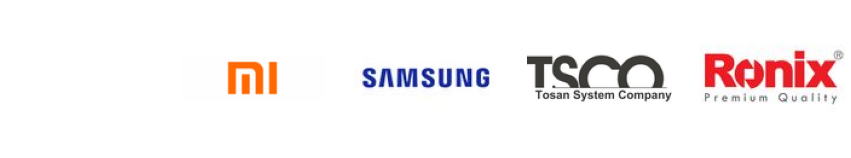

In [153]:
top_brand_urls = df['data_product_brand_logo_url'].dropna().value_counts().index[:5]

logos = []
for url in top_brand_urls:
    try:
        response = requests.get(eval(url)[0]) 
        logo = Image.open(BytesIO(response.content))
        logos.append(logo)
    except Exception as e:
        print(f"Could not retrieve brand logo from {url}: {e}")

# Display logos
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for ax, logo in zip(axs, logos):
    ax.imshow(logo)
    ax.axis('off')
plt.show()


Show top 5 products with the most comment count based on 'data_product_comments_count'


In [154]:
top_commented_products = df.nlargest(5, 'data_product_comments_count')[['data_product_title_fa', 'data_product_comments_count']]
top_commented_products.head()

,data_product_title_fa,data_product_comments_count
58151,هدفون بلوتوثی مدل inPods 12,59213.0
67461,پایه نگهدارنده گوشی و تبلت مدل OK Stand,46389.0
65576,برس پاک‌سازی مدل beauty skin,29190.0
17228,پایه نگهدارنده شارژر موبایل مدل Hng 0229,23643.0
15381,ماشین اصلاح سر و صورت کیمی مدل KM-5017,21738.0
